In [1]:
import os
import sys
sys.path.append(os.path.abspath('../scripts'))
from new_engagement_analysis import (
    load_and_prepare_data,
    aggregate_metrics,
    top_10_customers,
    normalize_and_cluster,
    cluster_statistics,
    top_10_users_per_application,
    plot_top_3_applications,
    elbow_method,
)

In [2]:
query = """
SELECT "Bearer Id", "MSISDN/Number", "Dur. (ms)", "Total DL (Bytes)", "Total UL (Bytes)",
        "Social Media DL (Bytes)", "Google DL (Bytes)", "Email DL (Bytes)", 
        "Youtube DL (Bytes)", "Netflix DL (Bytes)", "Gaming DL (Bytes)", "Other DL (Bytes)"
FROM xdr_data
"""
df = load_and_prepare_data(query)
print(df.head())

c:\Users\Tsega KisPay\Documents\GitHub\TellCo-Telecom-Analytics-Dashboard\scripts\load_data.py:38: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, connection)


      Bearer Id  MSISDN/Number  Dur. (ms)  Total DL (Bytes)  Total UL (Bytes)  \
0  1.311448e+19   3.366496e+10  1823652.0       308879636.0        36749741.0   
1  1.311448e+19   3.368185e+10  1365104.0       653384965.0        53800391.0   
2  1.311448e+19   3.376063e+10  1361762.0       279807335.0        27883638.0   
3  1.311448e+19   3.375034e+10  1321509.0       846028530.0        43324218.0   
4  1.311448e+19   3.369980e+10  1089009.0       569138589.0        38542814.0   

   Social Media DL (Bytes)  Google DL (Bytes)  Email DL (Bytes)  \
0                1545765.0          1634479.0         3563542.0   
1                1926113.0          3493924.0          629046.0   
2                1684053.0          8535055.0         2690151.0   
3                 644121.0          9023734.0         1439754.0   
4                 862600.0          6248284.0         1936496.0   

   Youtube DL (Bytes)  Netflix DL (Bytes)  Gaming DL (Bytes)  Other DL (Bytes)  
0          15854611.0        

In [3]:
user_aggregated_data = aggregate_metrics(df)
top_10_sessions, top_10_duration, top_10_data_volume = top_10_customers(user_aggregated_data)
print("Top 10 Customers by Sessions Frequency:\n", top_10_sessions)
print("Top 10 Customers by Session Duration:\n", top_10_duration)
print("Top 10 Customers by Data Volume:\n", top_10_data_volume)

Top 10 Customers by Sessions Frequency:
        MSISDN/Number  sessions_frequency  total_session_duration  \
13526   3.362632e+10                  18               8791927.0   
6437    3.361489e+10                  17               9966898.0   
13180   3.362578e+10                  17              18553754.0   
37052   3.365973e+10                  16               4035428.0   
76363   3.367588e+10                  15               4865947.0   
92923   3.376054e+10                  15               9279434.0   
65118   3.366716e+10                  13               8744914.0   
666     3.360313e+10                  12               6287761.0   
1279    3.360452e+10                  12               5207990.0   
13994   3.362708e+10                  12               4703516.0   

       total_download_data  total_upload_data  total_data_volume  
13526         7.301517e+09        669650721.0       7.971167e+09  
6437          8.156743e+09        689483001.0       8.846226e+09  
13180    

In [4]:
user_aggregated_data, kmeans = normalize_and_cluster(user_aggregated_data)
cluster_stats = cluster_statistics(user_aggregated_data)
print("Cluster Statistics:\n", cluster_stats)

Cluster Statistics:
   cluster sessions_frequency                                     \
                         min        max      mean           sum   
0       0          -1.716073   3.223059  0.973272  21861.625687   
1       1          -1.716073   0.753493 -0.443380 -35728.449846   
2       2           0.753493  20.510022  3.637677  13866.824159   

  total_session_duration                                     \
                     min        max      mean           sum   
0              -0.686487   8.328065  0.360494   8097.417514   
1              -0.746012   7.658670 -0.220402 -17760.440879   
2              -0.426991  98.775512  2.534896   9663.023365   

  total_download_data  ...                         total_upload_data  \
                  min  ...      mean           sum               min   
0           -1.006936  ...  0.853774  19177.467416         -0.880924   
1           -1.345004  ... -0.387513 -31226.547198         -1.526819   
2           -0.492958  ...  3.160829  1

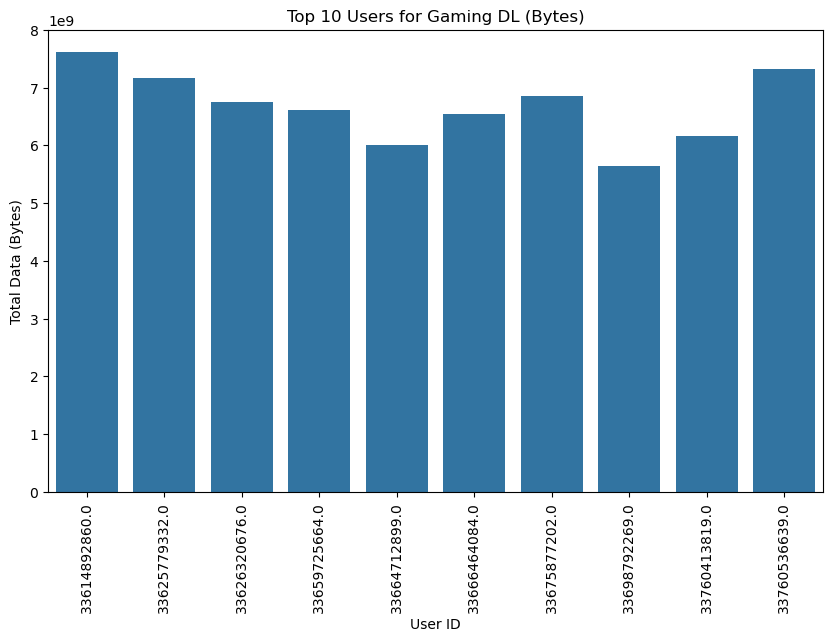

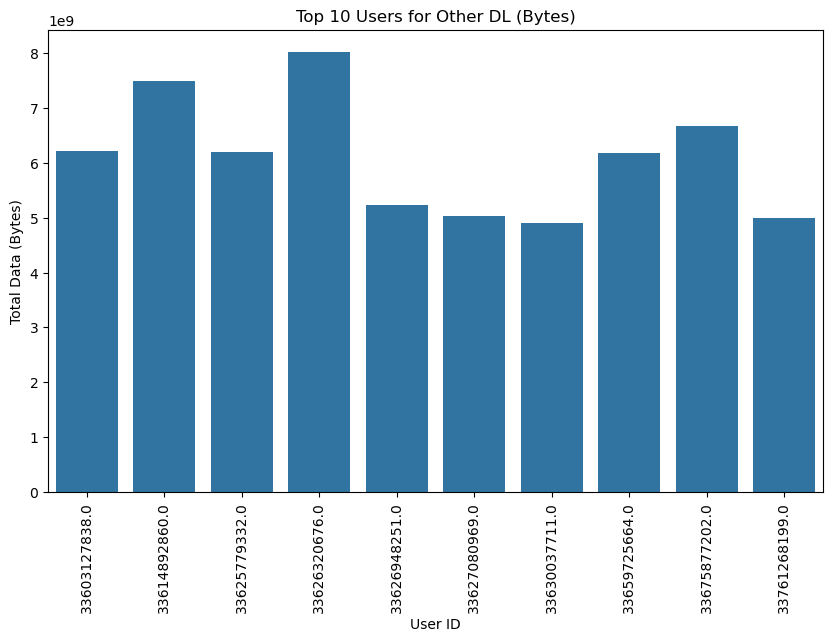

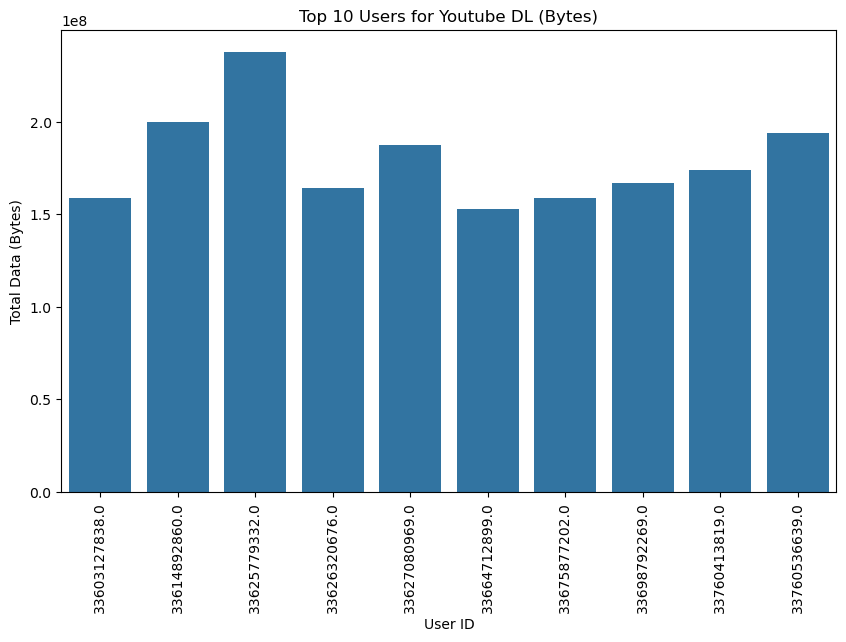

In [5]:
top_10_users = top_10_users_per_application(df)
plot_top_3_applications(top_10_users)

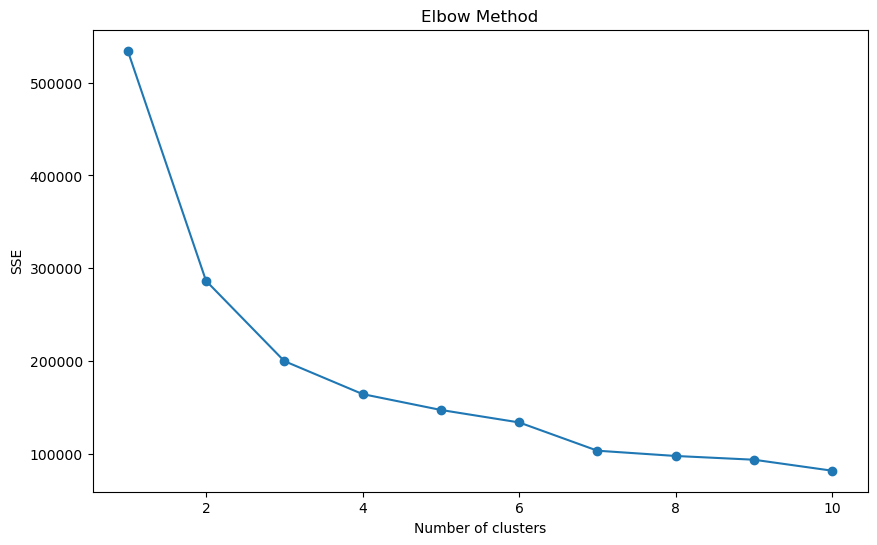

In [6]:
elbow_method(user_aggregated_data)